In [162]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [163]:
import numpy as np
import pandas as pd
import torch
import re
from sklearn.metrics import balanced_accuracy_score, roc_auc_score,accuracy_score,precision_recall_fscore_support
from Constants import *
from Preprocessing import *
from Models import *
import copy
from Utils import *
pd.set_option('display.max_rows', 200)


In [4]:
pd.read_csv('../data/digital_twin_ln_monograms.csv')

,id,L1A,L1B,L2A,L2B,L3,L4,L5A,L5B,L6,...,R1A,R1B,R2A,R2B,R3,R4,R5A,R5B,R6,RRPLN
0,3,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,7,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531,10201,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
532,10202,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
533,10203,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
534,10204,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [164]:
data = DTDataset(use_smote=False)
data.processed_df.T
# data.processed_df#.shape, len(data.processed_df.index.unique())

id,3,5,6,7,8,9,10,11,13,14,...,10196,10197,10198,10199,10200,10201,10202,10203,10204,10205
hpv,1,0,1,1,1,1,-1,1,0,1,...,0,1,-1,0,1,1,0,1,0,1
age,55.969444,20.95,69.930556,72.319444,59.730556,60.083333,67.708333,57.858333,51.758333,56.25,...,47.619444,50.163889,70.888889,67.825,56.336111,49.566667,48.705556,77.116667,45.95,49.733333
packs_per_year,0.0,38.0,35.0,0.0,0.0,0.0,40.0,44.0,0.0,40.0,...,5.0,0.0,50.0,0.0,0.0,30.0,30.0,0.0,5.0,0.0
gender,1,1,0,1,1,1,1,1,1,1,...,0,1,0,1,1,1,1,1,1,1
smoking_status,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.5,0.0,0.5,0.0,0.0,1.0,1.0,0.0,0.5,0.0
Aspiration rate Pre-therapy,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
OS (Calculated),6.033333,7.333333,7.466667,7.8,8.066667,8.733333,9.1,9.8,10.033333,10.033333,...,139.033333,139.3,140.6,142.833333,143.033333,143.2,144.366667,148.366667,152.6,155.533333
Locoregional control (Time),4.7,7.333333,7.466667,7.8,8.066667,8.733333,6.7,8.5,10.033333,10.033333,...,139.033333,139.3,140.6,142.833333,143.033333,143.2,144.366667,148.366667,152.6,155.533333
FDM (months),6.033333,7.333333,7.466667,7.8,8.066667,6.633333,9.1,9.8,10.033333,10.033333,...,139.033333,139.3,140.6,142.833333,143.033333,143.2,144.366667,136.033333,152.6,155.533333
time_to_event,4.7,6.0,6.0,6.0,8.066667,6.633333,6.0,8.5,6.0,10.033333,...,139.033333,139.3,140.6,142.833333,143.033333,143.2,6.0,136.033333,152.6,155.533333


In [165]:
def state_loss(ytrue,ypred,subweights=None,weights=None):
    if weights is None:
        weights = [1,1,1,1]
    if subweights is None:
        subweights = [None,None,None]
    pd_loss = torch.mul(mc_loss(ytrue[0],ypred[0],weights=subweights[0]),weights[0])
    nd_loss = torch.mul(mc_loss(ytrue[1],ypred[1],weights=subweights[1]),weights[1])
    mod_loss = torch.mul(mc_loss(ytrue[2],ypred[2],weights=subweights[2]),weights[2])
    loss = torch.add(pd_loss,torch.add(nd_loss,mod_loss))
    dlt_true = ytrue[3]
    dlt_pred = ypred[3]
    ndlt = dlt_true.shape[1]
#     nloss = torch.nn.NLLLoss()
    bce = torch.nn.BCELoss()
    for i in range(ndlt):
        dlt_loss = bce(dlt_pred[:,i].view(-1),dlt_true[:,i].view(-1))
        dlt_loss = torch.mul(dlt_loss,weights[3]/ndlt)
        loss = torch.add(loss,dlt_loss)
    return loss

def outcome_loss(ytrue,ypred,weights=None,**kwargs):
    if weights is None:
        weights = [1,1,1,1]
    loss = 0
    nloss = torch.nn.BCELoss()
    for i in range(len(weights)):
        iloss = nloss(ypred[:,i],ytrue[i])*weights[i]
        loss += iloss
    return loss

In [168]:

        
def train_state(model=None,
                model_args={},
                state=1,
                split=.7,
                lr=.001,
                epochs=1000,
                patience=10,
                weights=None,
                save_path='../data/models/',
                use_default_split=True,
                use_bagging_split=False,
                resample_training=False,#use bootstraping on training data after splitting
                n_validation_trainsteps=2,
                verbose=True,
                balanced=True,
                sqrt_balance_weights=False,
                use_smote=False,
                smote_cols = None,
                file_suffix=''):
    
    ids = get_dt_ids()
    
    train_ids, test_ids = get_tt_split(use_default_split=use_default_split,use_bagging_split=use_bagging_split,resample_training=resample_training)

    if use_smote:
        if smote_cols is None:
            smote_cols = Const.outcomes
            if state == 1:
                smote_cols = Const.primary_disease_states
            elif state == 2:
                smote_cols = Const.primary_disease_states2
        dataset = DTDataset(use_smote=True,smote_ids = train_ids,smote_columns=[Const.decisions[state-1]])
        train_ids = [i for i in dataset.processed_df.index.values if i not in test_ids]
    else:
        dataset = DTDataset()
    
    #only train on people with  IC for state 1 since other people can't have any outcomes otherwise
    require = None
    if state == 1:
        require = Const.decisions[0] #we don't expect a state update if there is no treatment
        valid_ids = dataset.get_input_state(require=require).index.values
        train_ids = [t for t in train_ids if t in valid_ids]
        test_ids = [t for t in test_ids if t in valid_ids]
    xtrain = dataset.get_input_state(step=state,ids=train_ids,require=require)
    xtest = dataset.get_input_state(step=state,ids=test_ids,require=require)
    ytrain = dataset.get_intermediate_outcomes(step=state,ids=train_ids,require=require)
    ytest = dataset.get_intermediate_outcomes(step=state,ids=test_ids,require=require)
    
    model_args = {k:v for k,v in model_args.items() if 'attention' not in k and 'embed_size' not in k}
    if state < 3:
        if model is None:
                model = BayesianOutcomeSimulator(xtrain.shape[1],state=state,**model_args)
        lfunc = state_loss
        if weights is None:
            weights = [1,1,.1,1]
    else:
        if model is None:
                model = BayesianEndpointSimulator(xtrain.shape[1],**model_args)
        if weights is None:
            weights = [1,1,1,1]
        lfunc = outcome_loss
    print(model.passthrough)
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    model.set_device(device)
    
    balance_weights=None
    if balanced:
        if state < 3:
            balance_weights = [w.to(device) for w in get_weights(ytrain)]
            if sqrt_balance_weights:
                balance_weights = [torch.sqrt(w) for w in balance_weights]
        else:
            print('I dont do balancing on the outputs because Idk how that would work')
    
    hashcode = str(hash(','.join([str(i) for i in train_ids])))
    save_file = save_path + 'model_' + model.identifier + '_split' + str(split) + '_resample' + str(resample_training) +  '_hash' + hashcode + file_suffix + '.tar'
    xtrain = df_to_torch(xtrain).to(device)
    
    xtest = df_to_torch(xtest).to(device)
    ytrain = [df_to_torch(t).to(device) for t in ytrain]
    ytest= [df_to_torch(t).to(device) for t in ytest]
    
    model.fit_normalizer(xtrain)
    
    optimizer = torch.optim.Adam(model.parameters(),lr=lr)
    best_val_loss = 1000000000000000000000000000
    best_loss_metrics = {}
    last_epoch = False
    for epoch in range(epochs):
        
        model.train(True)
        optimizer.zero_grad()
        
        xtrain_sample = xtrain#[torch.randint(len(xtrain),(len(xtrain),) )]
        ypred = model(xtrain_sample,n_samples=1)
        loss = lfunc(ytrain,ypred,weights=weights,subweights=balance_weights)

        loss.backward()
        optimizer.step()
        if verbose:
            print('epoch',epoch,'train loss',loss.item())
        
        model.eval()
        yval = model(xtest,n_samples=1)
        val_loss = lfunc(ytest,yval,weights=weights,subweights=balance_weights)
        if state < 3:
            val_metrics = state_metrics(ytest,yval)
        else:
            val_metrics = outcome_metrics(ytest,yval)
        if val_loss.item() < best_val_loss:
            best_val_loss = val_loss.item()
            best_loss_metrics = val_metrics
            steps_since_improvement = 0
            torch.save(model.state_dict(),save_file)
        else:
            steps_since_improvement += 1
        if verbose:
            print('val loss',val_loss.item())
            print('______________')
        if steps_since_improvement > patience:
            break
    print('best loss',best_val_loss,best_loss_metrics)
    model.load_state_dict(torch.load(save_file))
    
    #train one step on validation data
    for i in range(n_validation_trainsteps):
        model.train()
        yval = model(xtest,n_samples=1)
        val_loss = lfunc(ytest,yval,weights=weights)
        val_loss.backward()
        optimizer.step()
        torch.save(model.state_dict(),save_file)
    
    model.eval()
    print(model(xtest))
    return model,  best_val_loss, best_loss_metrics

from Models import *
t1_args = {'hidden_layers': [500,500],
   'dropout': 0.5,
   'input_dropout': 0.5}
tmodel_balanced = train_state(model_args=t1_args,state=1,lr=.0001,weights=[1,1,.1,1])
tmodel_balanced[-1]

True
epoch 0 train loss 3.059873580932617
val loss 3.0475687980651855
______________
epoch 1 train loss 3.0519778728485107
val loss 3.037947654724121
______________
epoch 2 train loss 3.028034210205078
val loss 3.0285582542419434
______________
epoch 3 train loss 3.010204315185547
val loss 3.019425392150879
______________
epoch 4 train loss 3.007395029067993
val loss 3.0104711055755615
______________
epoch 5 train loss 3.004073143005371
val loss 3.00177264213562
______________
epoch 6 train loss 2.992194175720215
val loss 2.993199586868286
______________
epoch 7 train loss 2.9642019271850586
val loss 2.984776020050049
______________
epoch 8 train loss 2.9612057209014893
val loss 2.976506471633911
______________
epoch 9 train loss 2.954024314880371
val loss 2.968346357345581
______________
epoch 10 train loss 2.929110050201416
val loss 2.9602959156036377
______________
epoch 11 train loss 2.926525354385376
val loss 2.9523372650146484
______________
epoch 12 train loss 2.913980722427368


{'predictions': [tensor([[0.4928, 0.2319, 0.2753],
        [0.5303, 0.2508, 0.2189],
        [0.4144, 0.2803, 0.3053],
        [0.3925, 0.2747, 0.3328],
        [0.4872, 0.2733, 0.2395],
        [0.4702, 0.2521, 0.2777],
        [0.3898, 0.3001, 0.3101],
        [0.3643, 0.2833, 0.3524],
        [0.4864, 0.2568, 0.2568],
        [0.3655, 0.2734, 0.3611],
        [0.5298, 0.2470, 0.2232],
        [0.3401, 0.2716, 0.3883],
        [0.3427, 0.2930, 0.3643],
        [0.4350, 0.2887, 0.2763],
        [0.3368, 0.2814, 0.3818],
        [0.4386, 0.2749, 0.2865],
        [0.4060, 0.2973, 0.2968],
        [0.3363, 0.3012, 0.3625],
        [0.3841, 0.3016, 0.3144],
        [0.5705, 0.2226, 0.2069],
        [0.4979, 0.2666, 0.2355],
        [0.4752, 0.2688, 0.2560],
        [0.4001, 0.2978, 0.3021],
        [0.4026, 0.2707, 0.3267],
        [0.4826, 0.2752, 0.2422],
        [0.2786, 0.3556, 0.3658],
        [0.3835, 0.3177, 0.2988],
        [0.4045, 0.3013, 0.2942],
        [0.4442, 0.2993, 0.2565

{'pd': {'accuracy': 0.30952380952380953,
  'auc_micro': 0.6172164119066773,
  'auc_mean': 0.5387440920327916,
  'auc_weighted': 0.5826149504786146},
 'nd': {'accuracy': 0.2962962962962963,
  'auc_micro': 0.16138374899436847,
  'auc_mean': 0.40730715170573667,
  'auc_weighted': 0.2785734705546027},
 'mod': {'accuracy': 0.2962962962962963,
  'auc_micro': 0.16138374899436847,
  'auc_mean': 0.40730715170573667,
  'auc_weighted': 0.2785734705546027},
 'dlts': {'accuracy': [0.7857142857142857,
   0.8928571428571429,
   0.9107142857142857,
   0.9464285714285714,
   0.8035714285714286],
  'accuracy_mean': 0.8678571428571429,
  'auc': [0.3787878787878788,
   0.45333333333333337,
   0.596078431372549,
   0.5031446540880503,
   0.5272727272727273],
  'auc_mean': 0.4917234049709077}}

In [169]:
tmodel2_balanced = train_state(model_args=t1_args,state=2,lr=.001,weights=[1,1,.1,1],use_smote=False)
tmodel2_balanced[-1]

True
epoch 0 train loss 2.8485398292541504
val loss 2.7995493412017822
______________
epoch 1 train loss 2.734757900238037
val loss 2.7321619987487793
______________
epoch 2 train loss 2.668363571166992
val loss 2.6781983375549316
______________
epoch 3 train loss 2.594677448272705
val loss 2.6337931156158447
______________
epoch 4 train loss 2.5526328086853027
val loss 2.6012423038482666
______________
epoch 5 train loss 2.498991012573242
val loss 2.5778346061706543
______________
epoch 6 train loss 2.494217872619629
val loss 2.562265634536743
______________
epoch 7 train loss 2.4240756034851074
val loss 2.552873373031616
______________
epoch 8 train loss 2.420686960220337
val loss 2.5482935905456543
______________
epoch 9 train loss 2.4513015747070312
val loss 2.546400547027588
______________
epoch 10 train loss 2.3852906227111816
val loss 2.5439209938049316
______________
epoch 11 train loss 2.316455841064453
val loss 2.5416195392608643
______________
epoch 12 train loss 2.416880846

{'pd': {'accuracy': 0.41793330976788035,
  'auc_micro': 0.7947998503554059,
  'auc_mean': 0.5737713836763664,
  'auc_weighted': 0.6698207964863278},
 'nd': {'accuracy': 0.47960618846694797,
  'auc_micro': 0.5587706855791962,
  'auc_mean': 0.6462857946486413,
  'auc_weighted': 0.5455822973985921},
 'mod': {'accuracy': 0.47960618846694797,
  'auc_micro': 0.5587706855791962,
  'auc_mean': 0.6462857946486413,
  'auc_weighted': 0.5455822973985921},
 'dlts': {'accuracy': [0.9523809523809523,
   0.9659863945578231,
   0.9659863945578231,
   0.9795918367346939,
   0.9183673469387755],
  'accuracy_mean': 0.9564625850340136,
  'auc': [0.6,
   0.643661971830986,
   0.46197183098591554,
   0.7430555555555556,
   0.575925925925926],
  'auc_mean': 0.6049230568596766}}

In [170]:
tmodel1 = train_state(model_args=t1_args,state=1,lr=.0001,weights=[1,1,.1,1],balanced=False)
tmodel1[1]

True
epoch 0 train loss 3.080742359161377
val loss 3.062634229660034
______________
epoch 1 train loss 3.059621810913086
val loss 3.0490384101867676
______________
epoch 2 train loss 3.0407726764678955
val loss 3.0357325077056885
______________
epoch 3 train loss 3.0215752124786377
val loss 3.0225942134857178
______________
epoch 4 train loss 3.007042646408081
val loss 3.0095856189727783
______________
epoch 5 train loss 2.9928855895996094
val loss 2.9967219829559326
______________
epoch 6 train loss 2.973318576812744
val loss 2.983933210372925
______________
epoch 7 train loss 2.959923505783081
val loss 2.9712271690368652
______________
epoch 8 train loss 2.9284117221832275
val loss 2.9585702419281006
______________
epoch 9 train loss 2.928635358810425
val loss 2.945906162261963
______________
epoch 10 train loss 2.90486741065979
val loss 2.9332542419433594
______________
epoch 11 train loss 2.8958935737609863
val loss 2.9205875396728516
______________
epoch 12 train loss 2.8821587562

val loss 2.293219566345215
______________
epoch 102 train loss 2.189260959625244
val loss 2.2920243740081787
______________
epoch 103 train loss 2.1899211406707764
val loss 2.2908382415771484
______________
epoch 104 train loss 2.2092297077178955
val loss 2.2895472049713135
______________
epoch 105 train loss 2.2053143978118896
val loss 2.28823184967041
______________
epoch 106 train loss 2.184675455093384
val loss 2.2869784832000732
______________
epoch 107 train loss 2.2011818885803223
val loss 2.2856807708740234
______________
epoch 108 train loss 2.2003800868988037
val loss 2.2844505310058594
______________
epoch 109 train loss 2.1822431087493896
val loss 2.283299684524536
______________
epoch 110 train loss 2.191084861755371
val loss 2.282125473022461
______________
epoch 111 train loss 2.1893560886383057
val loss 2.281020164489746
______________
epoch 112 train loss 2.195972442626953
val loss 2.2799110412597656
______________
epoch 113 train loss 2.184896945953369
val loss 2.2787

val loss 2.2261974811553955
______________
epoch 206 train loss 2.0954039096832275
val loss 2.225830554962158
______________
epoch 207 train loss 2.0876553058624268
val loss 2.225322723388672
______________
epoch 208 train loss 2.1119985580444336
val loss 2.22475528717041
______________
epoch 209 train loss 2.1173601150512695
val loss 2.224304437637329
______________
epoch 210 train loss 2.103910446166992
val loss 2.223879337310791
______________
epoch 211 train loss 2.1145710945129395
val loss 2.2234411239624023
______________
epoch 212 train loss 2.0841360092163086
val loss 2.222980260848999
______________
epoch 213 train loss 2.1102545261383057
val loss 2.22263240814209
______________
epoch 214 train loss 2.0676887035369873
val loss 2.2222442626953125
______________
epoch 215 train loss 2.089869737625122
val loss 2.2219674587249756
______________
epoch 216 train loss 2.1048479080200195
val loss 2.2216296195983887
______________
epoch 217 train loss 2.097607374191284
val loss 2.22129

2.2187044620513916

In [171]:
tmodel2 = train_state(model_args=t1_args,state=2,lr=.001,weights=[1,1,.1,1],balanced=False)
tmodel2[-1]

True
epoch 0 train loss 2.884871006011963
val loss 2.7672245502471924
______________
epoch 1 train loss 2.7081034183502197
val loss 2.628927230834961
______________
epoch 2 train loss 2.5365307331085205
val loss 2.4884705543518066
______________
epoch 3 train loss 2.3873772621154785
val loss 2.3543004989624023
______________
epoch 4 train loss 2.2397007942199707
val loss 2.237830638885498
______________
epoch 5 train loss 2.143876791000366
val loss 2.1452903747558594
______________
epoch 6 train loss 2.0588982105255127
val loss 2.0769734382629395
______________
epoch 7 train loss 2.015490770339966
val loss 2.0324482917785645
______________
epoch 8 train loss 2.0037107467651367
val loss 2.0080528259277344
______________
epoch 9 train loss 1.987803339958191
val loss 1.9981358051300049
______________
epoch 10 train loss 2.0021519660949707
val loss 1.9972429275512695
______________
epoch 11 train loss 1.9991101026535034
val loss 2.001216173171997
______________
epoch 12 train loss 1.989677

{'pd': {'accuracy': 0.3333333333333333,
  'auc_micro': 0.9091844369622148,
  'auc_mean': 0.7637496207870599,
  'auc_weighted': 0.6764454721144771},
 'nd': {'accuracy': 0.3605972086984745,
  'auc_micro': 0.7578723404255319,
  'auc_mean': 0.5144727637975773,
  'auc_weighted': 0.5495057525091257},
 'mod': {'accuracy': 0.3605972086984745,
  'auc_micro': 0.7578723404255319,
  'auc_mean': 0.5144727637975773,
  'auc_weighted': 0.5495057525091257},
 'dlts': {'accuracy': [0.9523809523809523,
   0.9659863945578231,
   0.9659863945578231,
   0.9795918367346939,
   0.9183673469387755],
  'accuracy_mean': 0.9564625850340136,
  'auc': [0.8357142857142856,
   0.6380281690140845,
   0.5140845070422535,
   0.6921296296296295,
   0.6234567901234568],
  'auc_mean': 0.660682676304742}}

In [172]:
tmodel3 = train_state(model_args=t1_args,state=3,lr=.0001,weights=[.01,1,1,.01],balanced=False)
tmodel3[-1]

True
epoch 0 train loss 1.3574738502502441
val loss 1.3396203517913818
______________
epoch 1 train loss 1.3154988288879395
val loss 1.3146865367889404
______________
epoch 2 train loss 1.2916728258132935
val loss 1.2912061214447021
______________
epoch 3 train loss 1.25283944606781
val loss 1.269127368927002
______________
epoch 4 train loss 1.2128483057022095
val loss 1.2484186887741089
______________
epoch 5 train loss 1.2084474563598633
val loss 1.229184865951538
______________
epoch 6 train loss 1.1698085069656372


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMe

val loss 1.2111448049545288
______________
epoch 7 train loss 1.1484793424606323
val loss 1.1943089962005615
______________
epoch 8 train loss 1.1444820165634155
val loss 1.1786493062973022
______________
epoch 9 train loss 1.1283105611801147
val loss 1.164149522781372
______________
epoch 10 train loss 1.1080957651138306
val loss 1.1508152484893799
______________
epoch 11 train loss 1.093427062034607
val loss 1.1385594606399536
______________
epoch 12 train loss 1.0821189880371094
val loss 1.1272752285003662
______________
epoch 13 train loss 1.0568914413452148


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMe

val loss 1.1168701648712158
______________
epoch 14 train loss 1.0572773218154907
val loss 1.1074199676513672
______________
epoch 15 train loss 1.0461626052856445
val loss 1.0987952947616577
______________
epoch 16 train loss 1.0456511974334717
val loss 1.090928554534912
______________
epoch 17 train loss 1.0354140996932983
val loss 1.0837584733963013
______________
epoch 18 train loss 1.00705087184906
val loss 1.0771305561065674
______________
epoch 19 train loss 1.0334019660949707
val loss 1.07109797000885
______________
epoch 20 train loss 1.0346660614013672


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMe

val loss 1.0656005144119263
______________
epoch 21 train loss 1.0245482921600342
val loss 1.0605837106704712
______________
epoch 22 train loss 1.0117319822311401
val loss 1.055977702140808
______________
epoch 23 train loss 1.0214866399765015
val loss 1.0517412424087524
______________
epoch 24 train loss 1.0098751783370972
val loss 1.0477542877197266
______________
epoch 25 train loss 0.9985355138778687
val loss 1.0439465045928955
______________
epoch 26 train loss 1.0069655179977417
val loss 1.0403517484664917
______________
epoch 27 train loss 0.9928261637687683


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMe

val loss 1.0368767976760864
______________
epoch 28 train loss 0.991825520992279
val loss 1.0335240364074707
______________
epoch 29 train loss 0.9868125915527344
val loss 1.0302460193634033
______________
epoch 30 train loss 0.9763442277908325
val loss 1.0270785093307495
______________
epoch 31 train loss 1.002873182296753
val loss 1.0240323543548584
______________
epoch 32 train loss 0.9839648604393005
val loss 1.0210736989974976
______________
epoch 33 train loss 0.9671902656555176
val loss 1.0181752443313599
______________
epoch 34 train loss 0.9786010980606079


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMe

val loss 1.0153671503067017
______________
epoch 35 train loss 0.9717006683349609
val loss 1.012687087059021
______________
epoch 36 train loss 0.9470551609992981
val loss 1.0100911855697632
______________
epoch 37 train loss 0.9248089790344238
val loss 1.0075644254684448
______________
epoch 38 train loss 0.9344580769538879
val loss 1.0050780773162842
______________
epoch 39 train loss 0.9543741345405579
val loss 1.0026793479919434
______________
epoch 40 train loss 0.9489702582359314
val loss 1.0003211498260498
______________
epoch 41 train loss 0.9223778247833252


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMe

val loss 0.9980369210243225
______________
epoch 42 train loss 0.9325927495956421
val loss 0.9957759380340576
______________
epoch 43 train loss 0.9167171120643616
val loss 0.9935022592544556
______________
epoch 44 train loss 0.9032253623008728
val loss 0.9912445545196533
______________
epoch 45 train loss 0.9241993427276611
val loss 0.9890167117118835
______________
epoch 46 train loss 0.9018024802207947
val loss 0.9867734313011169
______________
epoch 47 train loss 0.9258854985237122
val loss 0.9845708608627319
______________
epoch 48 train loss 0.9125723242759705


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMe

val loss 0.9823660254478455
______________
epoch 49 train loss 0.9126425385475159
val loss 0.9801567196846008
______________
epoch 50 train loss 0.8986115455627441
val loss 0.9779512882232666
______________
epoch 51 train loss 0.9040296673774719
val loss 0.9757497310638428
______________
epoch 52 train loss 0.8913795351982117
val loss 0.9735744595527649
______________
epoch 53 train loss 0.8840897679328918
val loss 0.9714134335517883
______________
epoch 54 train loss 0.9164157509803772
val loss 0.9693021178245544
______________
epoch 55 train loss 0.8861061930656433


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMe

val loss 0.9671953320503235
______________
epoch 56 train loss 0.8757188320159912
val loss 0.9650702476501465
______________
epoch 57 train loss 0.8760347366333008
val loss 0.9629417061805725
______________
epoch 58 train loss 0.874550461769104
val loss 0.960807204246521
______________
epoch 59 train loss 0.8601459264755249
val loss 0.9586449861526489
______________
epoch 60 train loss 0.8855356574058533
val loss 0.9564666152000427
______________
epoch 61 train loss 0.8438268303871155
val loss 0.9542394280433655
______________
epoch 62 train loss 0.8697618246078491


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMe

val loss 0.9520553946495056
______________
epoch 63 train loss 0.8418664932250977
val loss 0.9498945474624634
______________
epoch 64 train loss 0.8407280445098877
val loss 0.9476929903030396
______________
epoch 65 train loss 0.8504858613014221
val loss 0.9454843997955322
______________
epoch 66 train loss 0.8423816561698914
val loss 0.9433176517486572
______________
epoch 67 train loss 0.8622784614562988
val loss 0.9412416219711304
______________
epoch 68 train loss 0.8357423543930054
val loss 0.9392521977424622
______________
epoch 69 train loss 0.8380593657493591


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMe

val loss 0.9373369216918945
______________
epoch 70 train loss 0.843306303024292
val loss 0.9355131387710571
______________
epoch 71 train loss 0.8374859690666199
val loss 0.9337259531021118
______________
epoch 72 train loss 0.8290356993675232
val loss 0.9319931864738464
______________
epoch 73 train loss 0.8502295613288879
val loss 0.9303345680236816
______________
epoch 74 train loss 0.8367541432380676
val loss 0.9287209510803223
______________
epoch 75 train loss 0.8244505524635315
val loss 0.9271388053894043
______________
epoch 76 train loss 0.8422021269798279


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMe

val loss 0.925626277923584
______________
epoch 77 train loss 0.8124300837516785
val loss 0.9241383671760559
______________
epoch 78 train loss 0.80866539478302
val loss 0.9226700067520142
______________
epoch 79 train loss 0.7996692061424255
val loss 0.9213011264801025
______________
epoch 80 train loss 0.8041038513183594
val loss 0.9199666976928711
______________
epoch 81 train loss 0.8041696548461914
val loss 0.9187549948692322
______________
epoch 82 train loss 0.795799732208252
val loss 0.9176332950592041
______________
epoch 83 train loss 0.792749285697937
val loss 0.9166354537010193
______________
epoch 84 train loss 0.7953153252601624
val loss 0.9156736135482788
______________
epoch 85 train loss 0.7900003790855408
val loss 0.914716362953186
______________
epoch 86 train loss 0.7831299304962158
val loss 0.913865864276886
______________
epoch 87 train loss 0.7927619218826294
val loss 0.9130504131317139
______________
epoch 88 train loss 0.775921106338501
val loss 0.9123044013977

{'Overall Survival (4 Years)': {'accuracy': 0.891156462585034,
  'mse': 0.12181496,
  'auc': 0.46278625954198477,
  'precision': 0.891156462585034,
  'recall': 1.0,
  'f1': 0.9424460431654677},
 'FT': {'accuracy': 0.7959183673469388,
  'mse': 0.16233434,
  'auc': 0.6608695652173914,
  'precision': 0.6,
  'recall': 0.1875,
  'f1': 0.2857142857142857},
 'Aspiration rate Post-therapy': {'accuracy': 0.8231292517006803,
  'mse': 0.123743095,
  'auc': 0.8092816274634456,
  'precision': 0.5,
  'recall': 0.23076923076923078,
  'f1': 0.3157894736842105},
 'LRC': {'accuracy': 0.8979591836734694,
  'mse': 0.10898266,
  'auc': 0.5737373737373738,
  'precision': 0.8979591836734694,
  'recall': 1.0,
  'f1': 0.9462365591397849}}

In [173]:
tmodel3_balanced = train_state(model_args=t1_args,state=3,lr=.001,weights=[.01,1,1,.01])
tmodel3_balanced[-1]

True
I dont do balancing on the outputs because Idk how that would work
epoch 0 train loss 1.3964802026748657
val loss 1.1963471174240112
______________
epoch 1 train loss 1.1404660940170288


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMe

val loss 1.106649398803711
______________
epoch 2 train loss 1.059977650642395
val loss 1.0775866508483887
______________
epoch 3 train loss 1.0262750387191772


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMe

val loss 1.0668699741363525
______________
epoch 4 train loss 1.0928176641464233
val loss 1.0498102903366089
______________
epoch 5 train loss 1.0171576738357544


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMe

val loss 1.0268012285232544
______________
epoch 6 train loss 0.994662880897522
val loss 1.0035358667373657
______________
epoch 7 train loss 0.9928768873214722


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMe

val loss 0.9851148128509521
______________
epoch 8 train loss 0.9309216737747192
val loss 0.973649263381958
______________
epoch 9 train loss 0.9165459275245667


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMe

val loss 0.967697024345398
______________
epoch 10 train loss 0.8732008337974548
val loss 0.9630144834518433
______________
epoch 11 train loss 0.861106812953949


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMe

val loss 0.9561439752578735
______________
epoch 12 train loss 0.8554192185401917
val loss 0.9457665085792542
______________
epoch 13 train loss 0.8295349478721619


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMe

val loss 0.9321502447128296
______________
epoch 14 train loss 0.8176907896995544
val loss 0.9187045693397522
______________
epoch 15 train loss 0.7976666688919067


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


val loss 0.9072685241699219
______________
epoch 16 train loss 0.7850359678268433
val loss 0.8999933004379272
______________
epoch 17 train loss 0.7819223999977112
val loss 0.8971668481826782
______________
epoch 18 train loss 0.7677599787712097
val loss 0.8978080153465271
______________
epoch 19 train loss 0.7467177510261536
val loss 0.9008331298828125
______________
epoch 20 train loss 0.7714910507202148
val loss 0.9040116667747498
______________
epoch 21 train loss 0.7713718414306641
val loss 0.9060133099555969
______________
epoch 22 train loss 0.7566870450973511
val loss 0.9070581197738647
______________
epoch 23 train loss 0.759768545627594
val loss 0.9077432751655579
______________
epoch 24 train loss 0.7474350333213806
val loss 0.9085972309112549
______________
epoch 25 train loss 0.7027341723442078
val loss 0.9105086922645569
______________
epoch 26 train loss 0.7426238059997559
val loss 0.9117539525032043
______________
epoch 27 train loss 0.7268173098564148
val loss 0.912162

{'Overall Survival (4 Years)': {'accuracy': 0.891156462585034,
  'mse': 0.11325208,
  'auc': 0.5333969465648855,
  'precision': 0.891156462585034,
  'recall': 1.0,
  'f1': 0.9424460431654677},
 'FT': {'accuracy': 0.7959183673469388,
  'mse': 0.15967897,
  'auc': 0.6739130434782609,
  'precision': 0.6666666666666666,
  'recall': 0.125,
  'f1': 0.21052631578947367},
 'Aspiration rate Post-therapy': {'accuracy': 0.8027210884353742,
  'mse': 0.123974934,
  'auc': 0.799745708836618,
  'precision': 0.0,
  'recall': 0.0,
  'f1': 0.0},
 'LRC': {'accuracy': 0.8979591836734694,
  'mse': 0.096907504,
  'auc': 0.6979797979797979,
  'precision': 0.8979591836734694,
  'recall': 1.0,
  'f1': 0.9462365591397849}}

In [174]:
[m[1] for m in [tmodel1,tmodel_balanced,tmodel2,tmodel2_balanced,tmodel3,tmodel3_balanced]]

[2.2187044620513916,
 2.7142395973205566,
 1.985084891319275,
 2.5229952335357666,
 0.902746319770813,
 0.8971668481826782]

In [175]:
tmodel1[0].set_device('cpu')
tmodel2[0].set_device('cpu')


torch.save(tmodel1[0],'../resources/transition1_model.pt')
torch.save(tmodel2[0],'../resources/transition2_model.pt')

# tmodel3[0].set_device('cpu')
# torch.save(tmodel3[0],'../resources/outcome_model.pt')
tmodel3[0].set_device('cpu')
torch.save(tmodel3[0],'../resources/outcome_model.pt')

In [176]:
def merge_tmodel_results(t1,t2,t3):
    r1 = t1[-1]
    r2 = t2[-1]
    r3 = t3[-1]
    res_list = []
    for state, result in enumerate([r1,r2,r3]):
        for outcome, metricdict in result.items():
            if outcome == 'dlts':
                for metric, values in metricdict.items():
                    try:
                        for dltname, value in zip(Const.dlt1,values):
                            entry = {
                                'state': state + 1,
                                'outcome': dltname,
                                'metric': metric,
                                'value': value,
                            }
                            res_list.append(entry)
                    except:
                        entry = {
                            'state': state + 1,
                            'outcome': outcome,
                            'metric': metric,
                            'value': values
                        }
                        res_list.append(entry)
            else:
                for metric, value in metricdict.items():
                    entry = {
                        'state': state + 1,
                        'outcome': outcome,
                        'metric': metric,
                        'value': value
                    }
                    res_list.append(entry)
    return pd.DataFrame(res_list)
import time
model_results = merge_tmodel_results(tmodel1,tmodel2,tmodel3_balanced)
model_results.to_csv('../results/transition_models_' + str(time.time()) + '.csv')
model_results_balanced = merge_tmodel_results(tmodel_balanced,tmodel2_balanced,tmodel3_balanced)
model_results_balanced

,state,outcome,metric,value
0,1,pd,accuracy,0.309524
1,1,pd,auc_micro,0.617216
2,1,pd,auc_mean,0.538744
3,1,pd,auc_weighted,0.582615
4,1,nd,accuracy,0.296296
5,1,nd,auc_micro,0.161384
6,1,nd,auc_mean,0.407307
7,1,nd,auc_weighted,0.278573
8,1,mod,accuracy,0.296296
9,1,mod,auc_micro,0.161384


In [186]:
from matplotlib.container import BarContainer
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
def plot_mc_results(mr,title='Model Performance for Multiclass Outcomes'):
    temp = mr.copy()
    temp['title'] = temp['outcome'] + temp['state'].astype(str)
    temp = temp.groupby('title').filter(lambda x: x[x.metric == 'auc_micro'].shape[0] > 0).reset_index()
    metrics = set(['auc_mean','accuracy','auc_micro','auc_weighted'])
    temp = temp[temp.metric.apply(lambda x: x in metrics)]
    temp = temp[temp.outcome.apply(lambda x: x not in ['Overall Survival (4 Years)', 'LRC'])]
    fig,ax = plt.subplots(1,1,figsize=(5,8))
    sns.barplot(
        data=temp,
        y='title',
        x='value',
        orient='h',
        hue='metric',
        ax=ax,
        palette='colorblind',
    )
    ax.set_title(title)
    ax.set_ylabel('Outcome')
    ax.set_xlabel('')
    ax.axvline(.5,c='white')
    ax.axvline(.75,c='white')
    ax.axvline(.25,c="white")
    ax.set_xlim(0,1)
    ax.set_xticks([.25,.5,.75])
    for container in ax.containers:
        for patch,value in zip(container.patches,container.datavalues):
            x,y = patch.xy
            x = x + patch._width
            y = y + (patch._height/2)
            value = np.round(value,2)
            ax.text(x,y,str(value),verticalalignment='center')

plot_mc_results(model_results)

[autoreload of matplotlib.style.core failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/IPython/extensions/autoreload.py", line 273, in check
    superreload(m, reload, self.old_objects)
  File "/usr/local/lib/python3.8/dist-packages/IPython/extensions/autoreload.py", line 496, in superreload
    update_generic(old_obj, new_obj)
  File "/usr/local/lib/python3.8/dist-packages/IPython/extensions/autoreload.py", line 393, in update_generic
    update(a, b)
  File "/usr/local/lib/python3.8/dist-packages/IPython/extensions/autoreload.py", line 361, in update_class
    update_instances(old, new)
  File "/usr/local/lib/python3.8/dist-packages/IPython/extensions/autoreload.py", line 315, in update_instances
    refs = gc.get_referrers(old)
KeyboardInterrupt
]
[autoreload of matplotlib.container failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/IPython/extensions/autoreload.py", line 273, in check
    superreload(m, 

AttributeError: 'Figure' object has no attribute 'items'

In [ ]:
plot_mc_results(model_results_balanced,title="Balanced Model Performance for Multiclass Outcomes")

In [ ]:
def plot_bool_results(mr,model_name=''):
    temp = mr.copy()
    temp['title'] = temp['outcome'] + temp['state'].apply(lambda x: str(x) if x < 3 else '')
    temp = temp.groupby('title').filter(lambda x: x[x.metric == 'auc'].shape[0] > 0).reset_index()
    metrics = set(['auc','accuracy'])
    temp = temp[temp.metric.apply(lambda x: x in metrics)]
    temp = temp[temp.outcome.apply(lambda x: x not in ['Overall Survival (4 Years)', 'LRC'])]
    fig,ax = plt.subplots(1,1,figsize=(5,8))
    sns.barplot(
        data=temp,
        y='title',
        x='value',
        orient='h',
        hue='metric',
        ax=ax,
        palette='colorblind',
    )
    ax.set_title(model_name + ' Model Performance for Boolean Outcomes')
    ax.set_ylabel('Outcome')
    ax.set_xlabel('')
    ax.axvline(.5,c='white')
    ax.axvline(.75,c='white')
    ax.axvline(.25,c="white")
    ax.set_xticks([.25,.5,.75])
    ax.set_xlim(0,1)
    for container in ax.containers:
        for patch,value in zip(container.patches,container.datavalues):
            x,y = patch.xy
            x = x + patch._width
            y = y + (patch._height/2)
            value = np.round(value,2)
            ax.text(x,y,str(value),verticalalignment='center')
plot_bool_results(model_results)

In [ ]:
plot_bool_results(model_results_balanced,'Balanced')

0
Axes(0.125,0.653529;0.0407895x0.226471)
1
Axes(0.173947,0.653529;0.0407895x0.226471)
2
Axes(0.222895,0.653529;0.0407895x0.226471)
3
Axes(0.271842,0.653529;0.0407895x0.226471)
4
Axes(0.320789,0.653529;0.0407895x0.226471)
5
Axes(0.369737,0.653529;0.0407895x0.226471)
6
Axes(0.418684,0.653529;0.0407895x0.226471)
7
Axes(0.467632,0.653529;0.0407895x0.226471)
8
Axes(0.516579,0.653529;0.0407895x0.226471)
9
Axes(0.565526,0.653529;0.0407895x0.226471)
10
Axes(0.614474,0.653529;0.0407895x0.226471)
11
Axes(0.663421,0.653529;0.0407895x0.226471)
12
Axes(0.712368,0.653529;0.0407895x0.226471)
13
Axes(0.761316,0.653529;0.0407895x0.226471)
14
Axes(0.810263,0.653529;0.0407895x0.226471)
15
Axes(0.859211,0.653529;0.0407895x0.226471)
0
Axes(0.125,0.381765;0.0407895x0.226471)
1
Axes(0.173947,0.381765;0.0407895x0.226471)
2
Axes(0.222895,0.381765;0.0407895x0.226471)
3
Axes(0.271842,0.381765;0.0407895x0.226471)
4
Axes(0.320789,0.381765;0.0407895x0.226471)
5
Axes(0.369737,0.381765;0.0407895x0.226471)
6
Axes(0.4

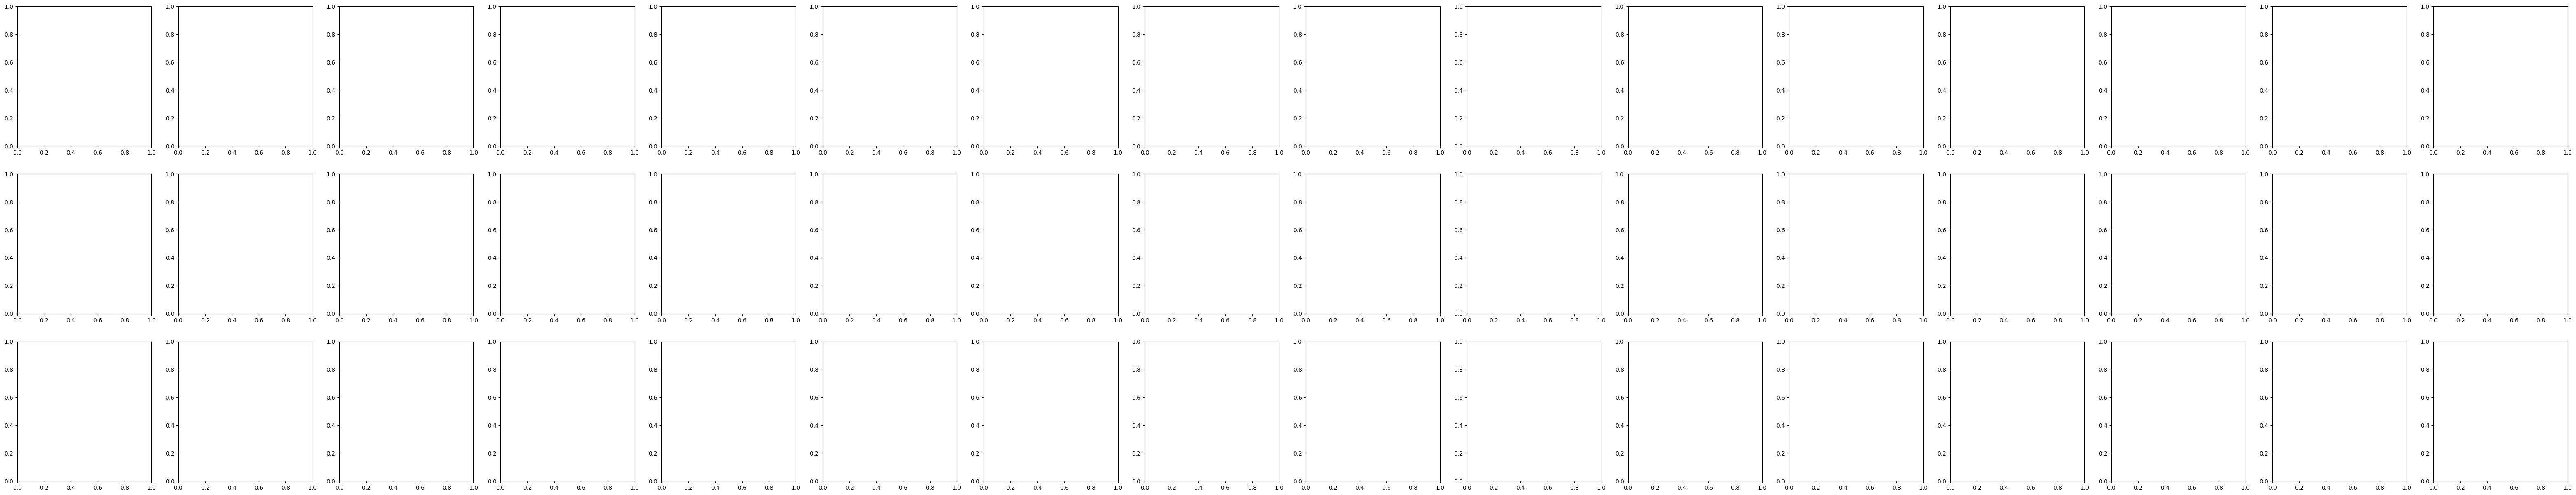

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
metrics = set(['auc','accuracy','f1','auc_weighted'])
subdf = model_results[model_results.metric.apply(lambda x: x in metrics)]
lengths = [subdf[subdf.state == i+1].shape[0] for i in range(3)]
fig, axes = plt.subplots(3,max(lengths),figsize=(5*max(lengths),15))
for i in range(3):
    axx = axes[i]
    subsubdf = subdf[subdf.state == i + 1]
    ii =0
    for iii,row in subsubdf.iterrows():
        ax = axes[i,ii]
        ii += 1
        

In [ ]:
#outdated code for doing an ensembel of stuff instead of using bayesian inference via dropout
def train_model_ensemble(model_arg_list,state,
                         n_bags=20,
                         smote_options=[True,False],
                         smote_baseline_options=[True,False],
                         weight_options=[None],
                         weight_baseline_options=[None],
                         **kwargs):
    resampled_models =[]
    base_models = []
    base_metrics = []
    resample_metrics = []
    base_losses = []
    resample_losses = []
    n_errors = 0
    for margs in model_arg_list:
        for s in smote_baseline_options:
            for w in weight_baseline_options:
                [base_model,blosses,bmetrics] = train_state(model_args=margs,state=state,
                                         resample_training=False,
                                         use_smote=smote_options,
                                         weights=w,
                                         verbose=False,**kwargs)
                base_models.append(base_model)
                base_metrics.append(bmetrics)
                base_losses.append(blosses)
        for n in range(n_bags):
            for s in smote_options:
                for w in weight_options:
                    #this can fail if I resample a bad distribution with no minority classes
                    done = False
                    while not done:
                        try:
                            [model,loss,metrics] = train_state(model_args=margs,
                                                state=state,resample_training=True,
                                                use_smote=s,
                                                weights=w,
                                                verbose=False,**kwargs)
                            resampled_models.append(model)
                            resample_metrics.append(metrics)
                            resample_losses.append(loss)
                            done=True
                            print('model_done',len(base_models)+len(resampled_models))
                        except Exception as e:
                            print('error training model')
                            print(e)
                            n_errors += 1
    print('done with',n_errors,'errors')
    return base_models,resampled_models